In [2]:
import os
import zipfile
import xml.etree.ElementTree as ET
from tqdm import tqdm
from PIL import Image
import random

# Set the path to your zip file
zip_file_path = "/content/est (1).zip"

# Create a directory to extract the contents of the zip file
extracted_path = "/content/extraction/est/est/est"
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Create a new directory for the augmented dataset
augmented_path = "/content/augmentation"
os.makedirs(augmented_path, exist_ok=True)

# Function to parse XML annotation file
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    return root.findall(".//object")

# Function to create a new XML annotation
def create_xml(root, filename, objects):
    annotation = ET.Element("annotation")
    folder = ET.SubElement(annotation, "folder")
    folder.text = "images"
    file_elem = ET.SubElement(annotation, "filename")
    file_elem.text = filename

    for obj in objects:
        annotation.append(obj)

    root.append(annotation)
    return ET.ElementTree(root)

# Function to perform data augmentation
def augment_data(input_path, output_path, target_num_images):
    image_files = [file for file in os.listdir(input_path) if file.endswith((".jpg", ".jpeg", ".png"))]

    if not image_files:
        print("No image files found in the input path.")
        print(f"Contents of {input_path}: {os.listdir(input_path)}")
        return

    for _ in tqdm(range(target_num_images), desc="Augmenting Data"):
        random_image_file = random.choice(image_files)
        image_path = os.path.join(input_path, random_image_file)
        xml_path = os.path.join(input_path, random_image_file.replace(".jpg", ".xml").replace(".jpeg", ".xml").replace(".png", ".xml"))

        # Load the image
        image = Image.open(image_path)

        # Load XML and parse
        root = ET.parse(xml_path).getroot()
        objects = parse_annotation(xml_path)

        # Randomly apply basic transformations
        if random.random() > 0.5:
            image = image.transpose(Image.FLIP_LEFT_RIGHT)

        if random.random() > 0.5:
            image = image.transpose(Image.FLIP_TOP_BOTTOM)

        # Save augmented image
        augmented_image_path = os.path.join(output_path, f"{_}_{random_image_file}")
        image.save(augmented_image_path)

        # Save augmented XML (no modification to annotations)
        augmented_xml_path = os.path.join(output_path, f"{_}_{random_image_file.replace('.jpg', '.xml').replace('.jpeg', '.xml').replace('.png', '.xml')}")
        create_xml(root, f"{_}_{random_image_file}", objects).write(augmented_xml_path)

# Set the target number of augmented images
target_num_images = 100

# Perform data augmentation
augment_data(extracted_path, augmented_path, target_num_images)

Augmenting Data: 100%|██████████| 100/100 [00:00<00:00, 172.80it/s]


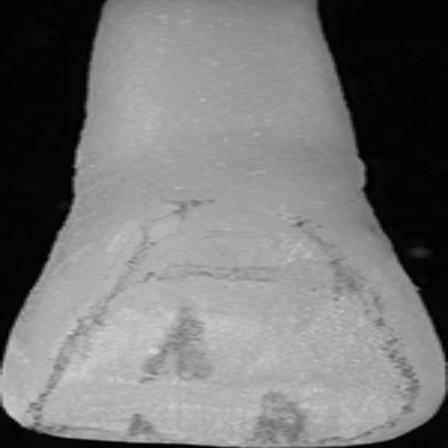

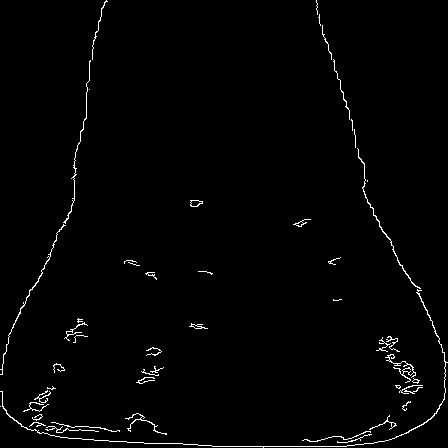

In [3]:
from google.colab.patches import cv2_imshow
import cv2

def detect_contours(image_path):
    # Charger l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer l'algorithme de détection de contours de Canny
    edges = cv2.Canny(image, 50, 150)

    # Afficher l'image originale et celle avec les contours détectés
    cv2_imshow(image)
    cv2_imshow(edges)

# Spécifier le chemin de l'image
image_path = "/content/1_15.jpg"

# Appeler la fonction pour détecter les contours et afficher les images
detect_contours(image_path)


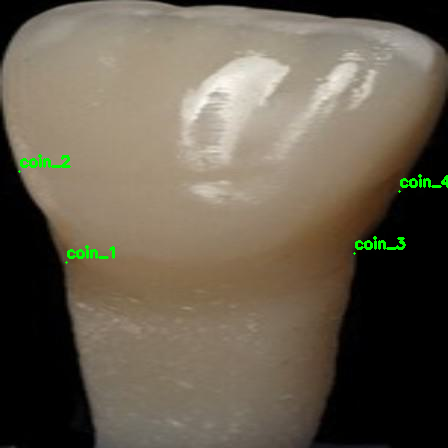

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import os
import xml.etree.ElementTree as ET

def draw_contours(image_path, xml_path):
    # Charger l'image
    image = cv2.imread(image_path)

    # Charger et parser le fichier XML d'annotation
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Récupérer les informations des objets annotés
    objects = root.findall(".//object")
    for obj in objects:
        name = obj.find("name").text
        bbox = obj.find("bndbox")

        # Récupérer les coordonnées de la boîte englobante
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        # Dessiner le contour sur l'image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Afficher l'image avec les contours
    cv2_imshow(image)

# Spécifier le chemin de l'image et du fichier XML
image_path = "/content/0_17.jpg"
xml_path = "/content/0_17.xml"

# Appeler la fonction pour dessiner les contours et afficher l'image
draw_contours(image_path, xml_path)






In [8]:
import numpy as np

def calculate_angle(ptA1, ptA2, ptB1, ptB2):
    vectorA = ptA2 - ptA1
    vectorB = ptB2 - ptB1

    dot_product = np.dot(vectorA, vectorB)
    normA = np.linalg.norm(vectorA)
    normB = np.linalg.norm(vectorB)

    cosine_similarity = dot_product / (normA * normB)

    # Ensure the value passed to arccos is within the valid range [-1, 1]
    cosine_similarity = np.clip(cosine_similarity, -1.0, 1.0)

    angle_radians = np.arccos(cosine_similarity)
    angle_degrees = np.degrees(angle_radians)

    return angle_degrees


['/content/extraction/est/est/est/est/0.xml', '/content/extraction/est/est/est/est/1.xml', '/content/extraction/est/est/est/est/10.xml', '/content/extraction/est/est/est/est/11.xml', '/content/extraction/est/est/est/est/12.xml', '/content/extraction/est/est/est/est/13.xml', '/content/extraction/est/est/est/est/14.xml', '/content/extraction/est/est/est/est/15.xml', '/content/extraction/est/est/est/est/16.xml', '/content/extraction/est/est/est/est/17.xml'] ['/content/extraction/est/est/est/est/0.jpg', '/content/extraction/est/est/est/est/1.jpg', '/content/extraction/est/est/est/est/10.jpg', '/content/extraction/est/est/est/est/11.jpg', '/content/extraction/est/est/est/est/12.jpg', '/content/extraction/est/est/est/est/13.jpg', '/content/extraction/est/est/est/est/14.jpg', '/content/extraction/est/est/est/est/15.jpg', '/content/extraction/est/est/est/est/16.jpg', '/content/extraction/est/est/est/est/17.jpg']


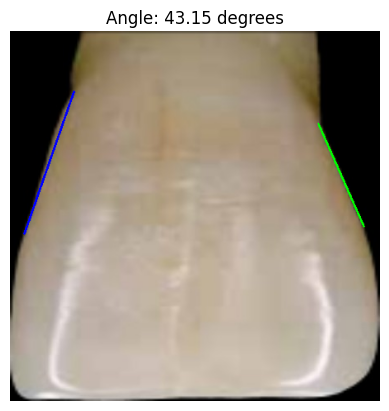

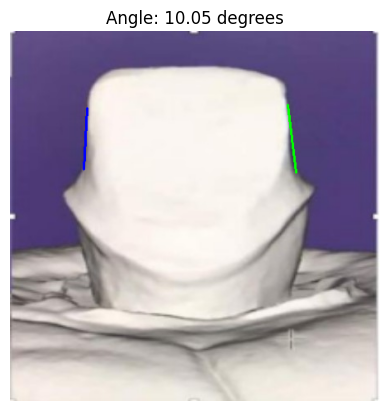

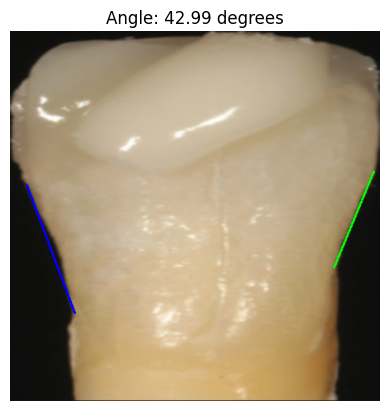

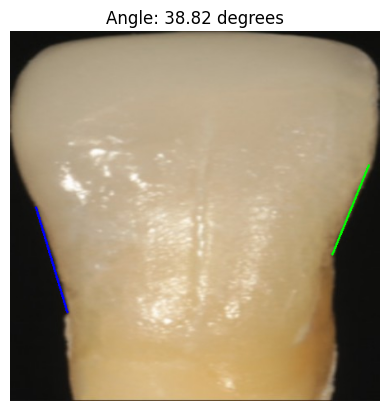

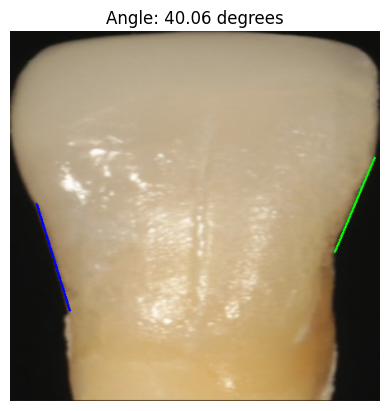

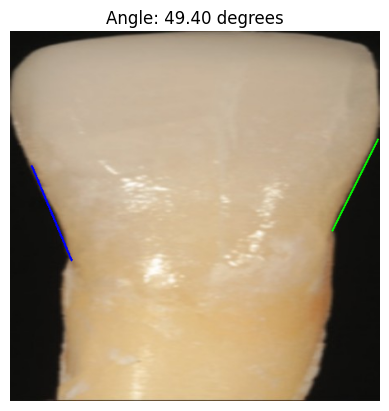

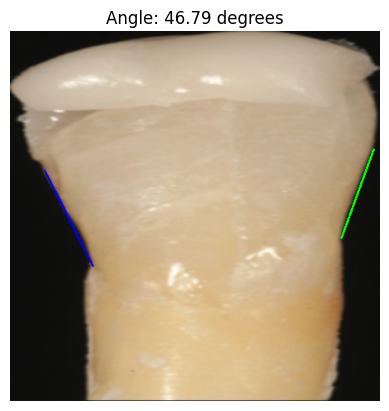

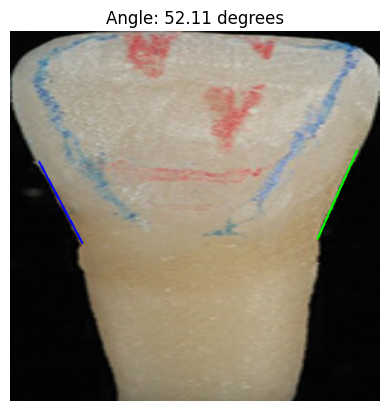

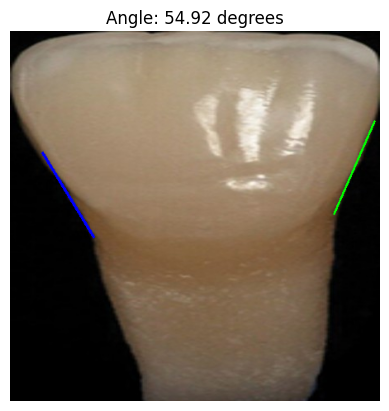

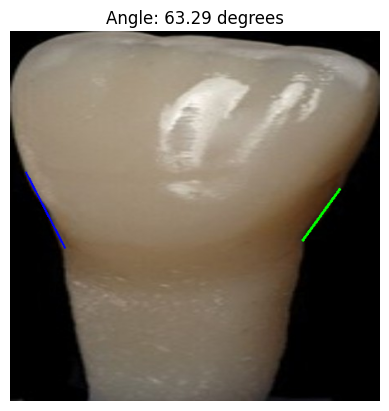

In [9]:
import cv2 as cv
import numpy as np
import os
import xml.etree.ElementTree as ET
import zipfile
import matplotlib.pyplot as plt

# We will proceed with the separate scripts for each of the steps mentioned before.
# The steps are: 1) Parse XML and extract points, 2) Load image, 3) Draw lines and calculate angles

# Step 1: Parse XML and extract points
def parse_xml_for_points(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    points = []
    for member in root.findall('object'):
        points.append({
            'name': member[0].text,
            'xmin': int(member[4][0].text),
            'ymin': int(member[4][1].text),
            'xmax': int(member[4][2].text),
            'ymax': int(member[4][3].text)
        })
    return points

# Step 2: Load image
def load_image(image_file_path):
    image = cv.imread(image_file_path)
    return image

# Step 3: Draw lines and calculate angles
def draw_lines_and_calculate_angles(image, points):
    # Assuming the points are given in the order: ptA1, ptA2, ptB1, ptB2
    # Convert points to a list of coordinates
    coordinates = [(point['xmin'], point['ymin']) for point in points]

    # Calculate angle between ptA1->ptA2 and ptB1->ptB2
    angle = calculate_angle(np.array(coordinates[0]), np.array(coordinates[1]), np.array(coordinates[2]), np.array(coordinates[3]))

    # Draw lines for visualization
    cv.line(image, coordinates[0], coordinates[1], (255, 0, 0), 2)
    cv.line(image, coordinates[2], coordinates[3], (0, 255, 0), 2)

    return image, angle

# Unzip the file to access the XML files and the images
#with zipfile.ZipFile('/mnt/data/est.zip', 'r') as zip_ref:
 #   zip_ref.extractall('/content/drive/MyDrive/cvImage/extraction_directory')

# List XML and JPG files
extracted_dir = '/content/extraction/est/est/est/est'
xml_files = [os.path.join(extracted_dir, f) for f in os.listdir(extracted_dir) if f.endswith('.xml')]
jpg_files = [os.path.join(extracted_dir, f) for f in os.listdir(extracted_dir) if f.endswith('.jpg')]

# Test the scripts against the pictures and the according XML
# We will only process the first three images and their corresponding XML files for demonstration
xml_files.sort()
jpg_files.sort()
print(xml_files[:10],jpg_files[:10])
for xml_file, jpg_file in zip(xml_files[:10], jpg_files[:10]):
    # Step 1: Extract points from XML
    points = parse_xml_for_points(xml_file)

    # Step 2: Load image
    image = load_image(jpg_file)

    # Step 3: Draw lines and calculate angles
    image_with_lines, angle = draw_lines_and_calculate_angles(image, points)

    # Display the result
    plt.imshow(cv.cvtColor(image_with_lines, cv.COLOR_BGR2RGB))
    plt.title(f"Angle: {angle:.2f} degrees")
    plt.axis('off')
    plt.show()


In [5]:
import math
import xml.etree.ElementTree as ET

def calculate_conicity_and_draft_angle(xml_path):
    # Charger et parser le fichier XML d'annotation
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Récupérer les informations des objets annotés
    objects = root.findall(".//object")

    # Variables pour les coordonnées des boîtes englobantes
    xmin_list, ymin_list, xmax_list, ymax_list = [], [], [], []

    for obj in objects:
        bbox = obj.find("bndbox")

        # Récupérer les coordonnées de la boîte englobante
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        # Ajouter les coordonnées à la liste
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        xmax_list.append(xmax)
        ymax_list.append(ymax)

    # Calculer les angles
    conicity_angle = calculate_conicity_angle(xmax_list, xmin_list, ymax_list, ymin_list)


    # Afficher les résultats
    print(f"Conicity Angle: {conicity_angle} degrees")

def calculate_conicity_angle(xmax_list, xmin_list, ymax_list, ymin_list):
    # Trouver le plus grand et le plus petit diamètre
    D1 = max(xmax_list) - min(xmin_list)
    D2 = max(ymax_list) - min(ymin_list)

    # Calculer l'angle de conicité en degrés
    conicity_angle = math.degrees(math.atan((D1 - D2) / D1))

    # Retourner l'angle de conicité
    return conicity_angle

# Spécifier le chemin du fichier XML d'annotation
xml_path = "/content/0_17.xml"

# Appeler la fonction pour calculer les angles
calculate_conicity_and_draft_angle(xml_path)


Conicity Angle: 37.25394404007259 degrees
